In [3]:
!pip3 install pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 1.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 2.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 2.5 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [5]:
!pip3 install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.2 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [7]:
!pip3 install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.7/167.7 kB 1.8 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [9]:
!pip3 install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 3.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.6/284.6 kB 5.9 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# For text preprocessing
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Visualization settings
sns.set(style="whitegrid")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kyawteaindraywin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
df = pd.read_csv("../data/IMDB_Dataset.csv")
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [12]:
df.info()
df.describe()
df['sentiment'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


sentiment
positive    25000
negative    25000
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

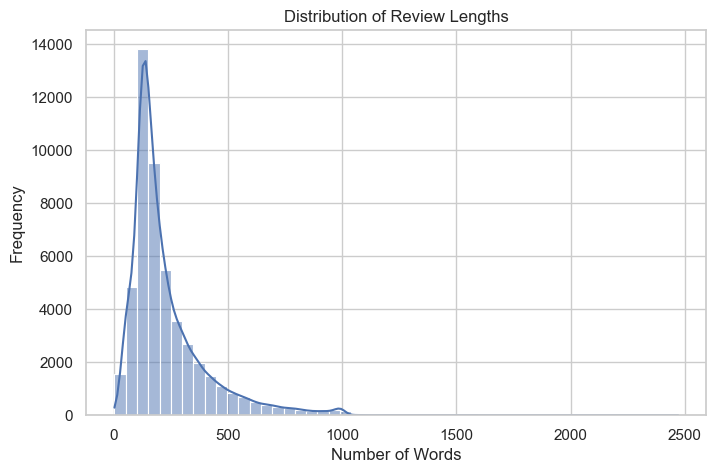

In [13]:
df['review_length'] = df['review'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")


In [14]:
def clean_text_for_vis(text):
    text = text.lower()
    text = re.sub(r"<.*?>", "", text)        # remove HTML
    text = re.sub(r"[^a-z\s]", "", text)     # remove punctuation
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)

df['cleaned'] = df['review'].apply(clean_text_for_vis)


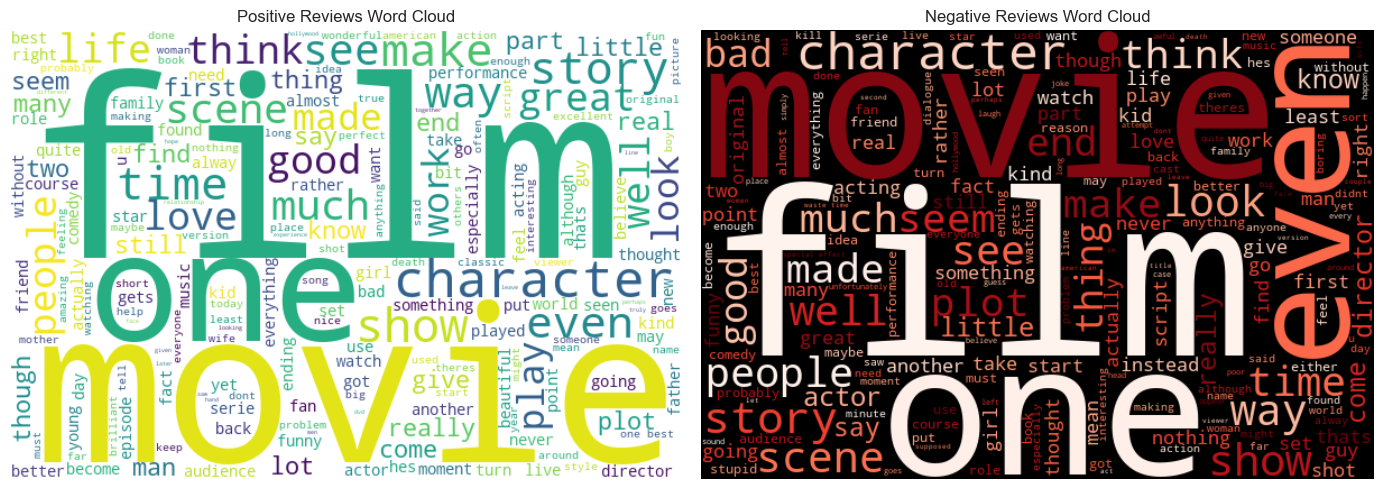

In [18]:
from wordcloud import WordCloud

# Generate separate text for each class
pos_text = " ".join(df[df['sentiment'] == 'positive']['cleaned'])
neg_text = " ".join(df[df['sentiment'] == 'negative']['cleaned'])

# Plot word clouds
plt.figure(figsize=(14,6))

# Positive
plt.subplot(1,2,1)
wc_pos = WordCloud(width=600, height=400, background_color='white').generate(pos_text)
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews Word Cloud")

# Negative
plt.subplot(1,2,2)
wc_neg = WordCloud(width=600, height=400, background_color='black', colormap='Reds').generate(neg_text)
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Reviews Word Cloud")

plt.tight_layout()
plt.show()


In [ ]:
sns.countplot(x='sentiment', data=df, palette='pastel')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")


/var/folders/c4/kbvyysv55vs2wm3lndrsfpsc0000gn/T/ipykernel_31390/2947269037.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


Text(0.5, 1.0, 'Top 20 Most Common Words in All Reviews')

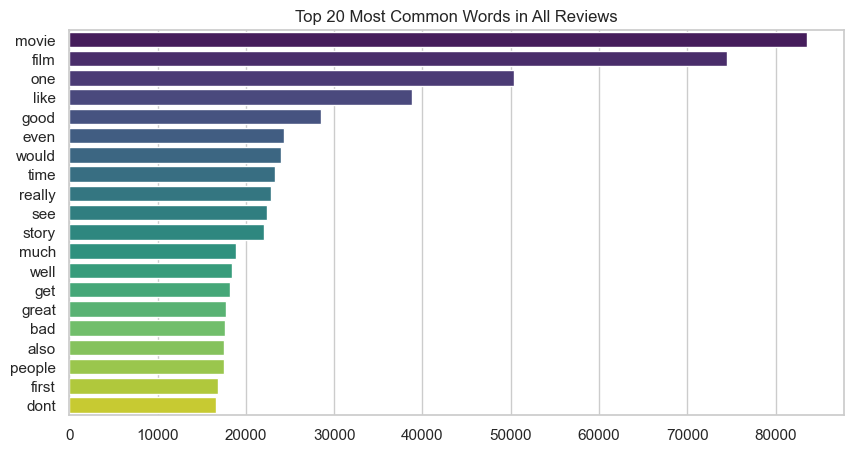

In [16]:
from collections import Counter

all_words = " ".join(df['cleaned']).split()
common_words = Counter(all_words).most_common(20)

words, counts = zip(*common_words)
plt.figure(figsize=(10,5))
sns.barplot(x=list(counts), y=list(words), palette='viridis')
plt.title("Top 20 Most Common Words in All Reviews")
